<a href="https://colab.research.google.com/github/saikrishnavankayala/Chat-Application/blob/main/image%20classication%20by%20using%20cnn%20with%20using%20gradio%20studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [6]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir) / 'flower_photos'

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [8]:
print(os.listdir(data_dir))


['LICENSE.txt', 'tulips', 'roses', 'dandelion', 'daisy', 'sunflowers']


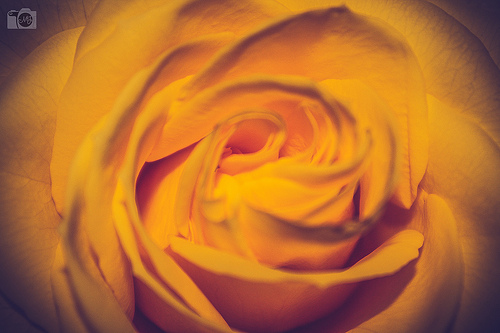

In [9]:
roses= list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[3]))


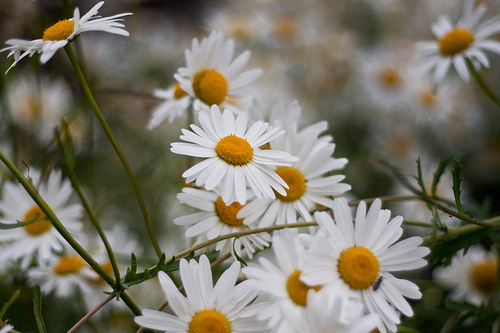

In [10]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[2]))


In [11]:
batch_size = 32
img_height = 180
img_width = 180


In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


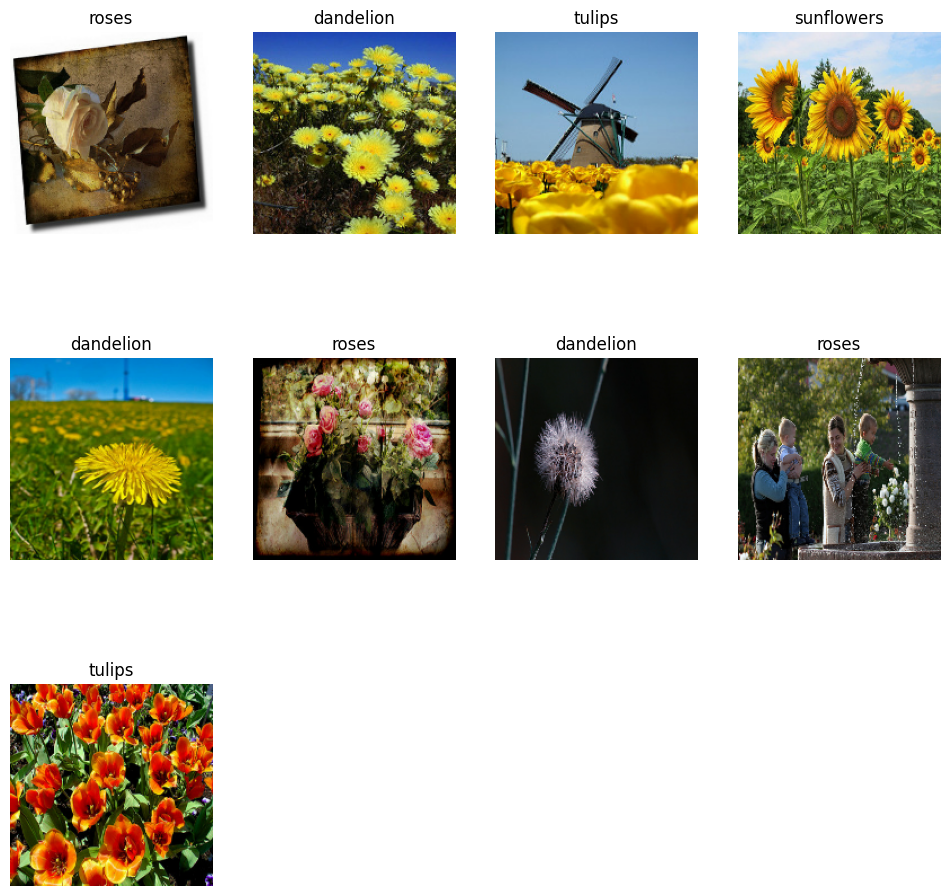

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [16]:
import tensorflow as tf # make sure tensorflow is imported
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers # import layers from tensorflow.keras

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # remove experimental
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [18]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.3064 - loss: 1.5569 - val_accuracy: 0.5668 - val_loss: 1.1260
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.5769 - loss: 1.0908 - val_accuracy: 0.5722 - val_loss: 1.0294
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.6664 - loss: 0.8692 - val_accuracy: 0.6608 - val_loss: 0.9139
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.7693 - loss: 0.6271 - val_accuracy: 0.6022 - val_loss: 1.1363
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8477 - loss: 0.4211 - val_accuracy: 0.6662 - val_loss: 1.2402
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9289 - loss: 0.2149 - val_accuracy: 0.6199 - val_loss: 1.5002
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9600 - loss: 0.1286 - val_accuracy: 0.6471 - val_loss: 1.4892
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9824 - loss: 0.0582 - val_accuracy: 0.6471 - val_loss:

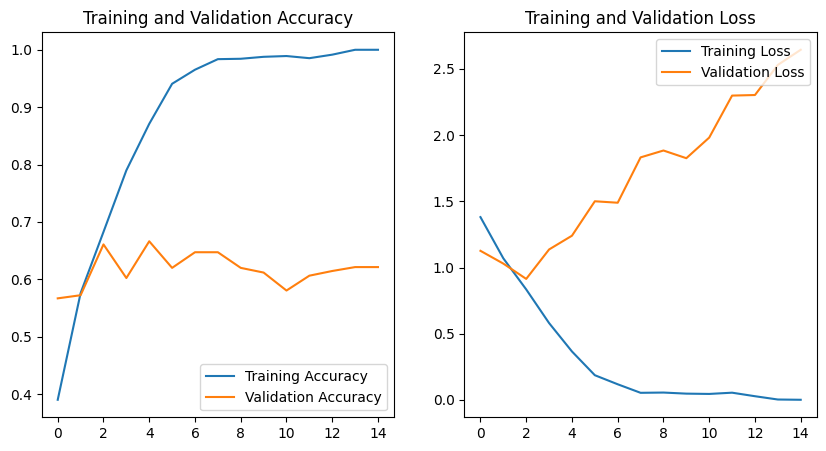

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [21]:
def predict_input_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
!pip install gradio

In [24]:
import gradio as gr

In [ ]:
import gradio as gr
import numpy as np

def predict_input_image(img):
    try:
        # Resize and preprocess the image (assuming input is 180x180 pixels)
        img_resized = np.resize(img, (180, 180, 3))  # Resizing if not 180x180x3

        # Expand dimensions to match model input shape (batch size of 1)
        img_4d = np.expand_dims(img_resized, axis=0)

        # Predict the probabilities for each class
        prediction = model.predict(img_4d)[0]

        # Return the top 5 class predictions with corresponding probabilities
        top_5_indices = np.argsort(prediction)[-5:][::-1]
        top_5_predictions = {class_names[i]: float(prediction[i]) for i in top_5_indices}

        return top_5_predictions

    except Exception as e:
        return {"error": str(e)}

# Set Gradio input to accept an image (ensure the input is in numpy array format)
# The shape argument has been removed
image = gr.Image(type='numpy')

# Use gr.Label to display top 5 class predictions
label = gr.Label(num_top_classes=5)

# Create and launch the Gradio interface
gr.Interface(fn=predict_input_image, inputs=image, outputs=label).launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8a00c3a45f26390cca.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
